@Author: Pooja
@Date: 12-11-2024
@Last modified by: Pooja
@Last modified Date: 12-11-2024
@Title: Multiple Linear Regression Predict Aperent Temperature

importing libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import datasets

In [71]:
df = pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


checking if dataset has null values

<Axes: >

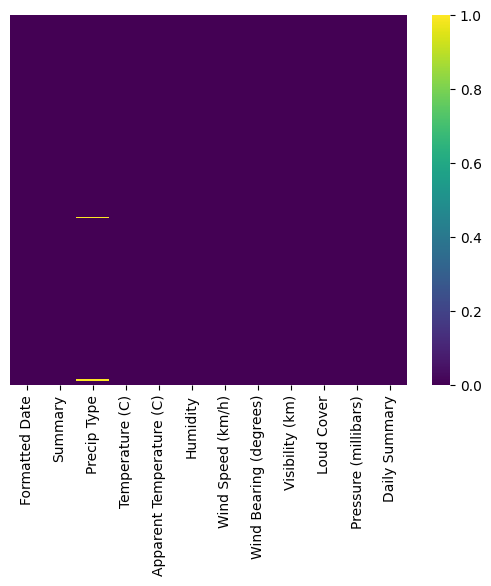

In [72]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

Remove Irrelevant Columns

In [73]:
df =df.drop(columns=['Formatted Date','Summary','Loud Cover','Daily Summary'])
df

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...
96448,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


handling Categorical Variables

In [74]:
df = pd.get_dummies(df, columns=['Precip Type'], drop_first=True)
df

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type_snow
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,False
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,False
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,False
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,False
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,False
...,...,...,...,...,...,...,...,...
96448,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,False
96449,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,False
96450,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,False
96451,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,False


feature selection

In [75]:
features = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']
X = df[features]
y = df['Apparent Temperature (C)']

In [76]:
X

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...
96448,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,21.522222,0.60,10.5294,20.0,16.1000,1015.95


handling outliers

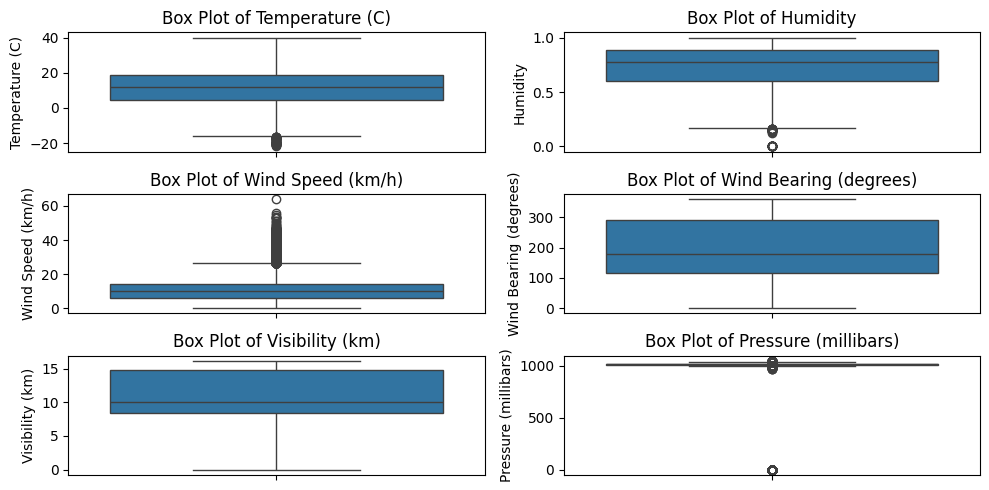

In [77]:
#detecting outliers
plt.figure(figsize=(10, 5))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i+1)  # Creating a subplot for each feature
    sns.boxplot(y=df[feature])  # Create a boxplot
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)

plt.tight_layout()  # Adjust layout
plt.show()

In [78]:
#removing outliers
# Calculate Q1, Q3, and IQR for the dataset
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows that have outliers in any feature
data_no_outliers = X[(X >= lower_bound) & (X <= upper_bound)].dropna()
y_no_outliers = y[data_no_outliers.index]#Sync with Target (y): Since data_no_outliers now only contains rows without outliers, we match y to this index.

# Display the remaining number of records
print(f'Removed outliers, remaining records: {data_no_outliers.shape[0]}')

# Split the cleaned dataset into arrays
X_clean = data_no_outliers.values
y_clean = y_no_outliers.values


Removed outliers, remaining records: 89269


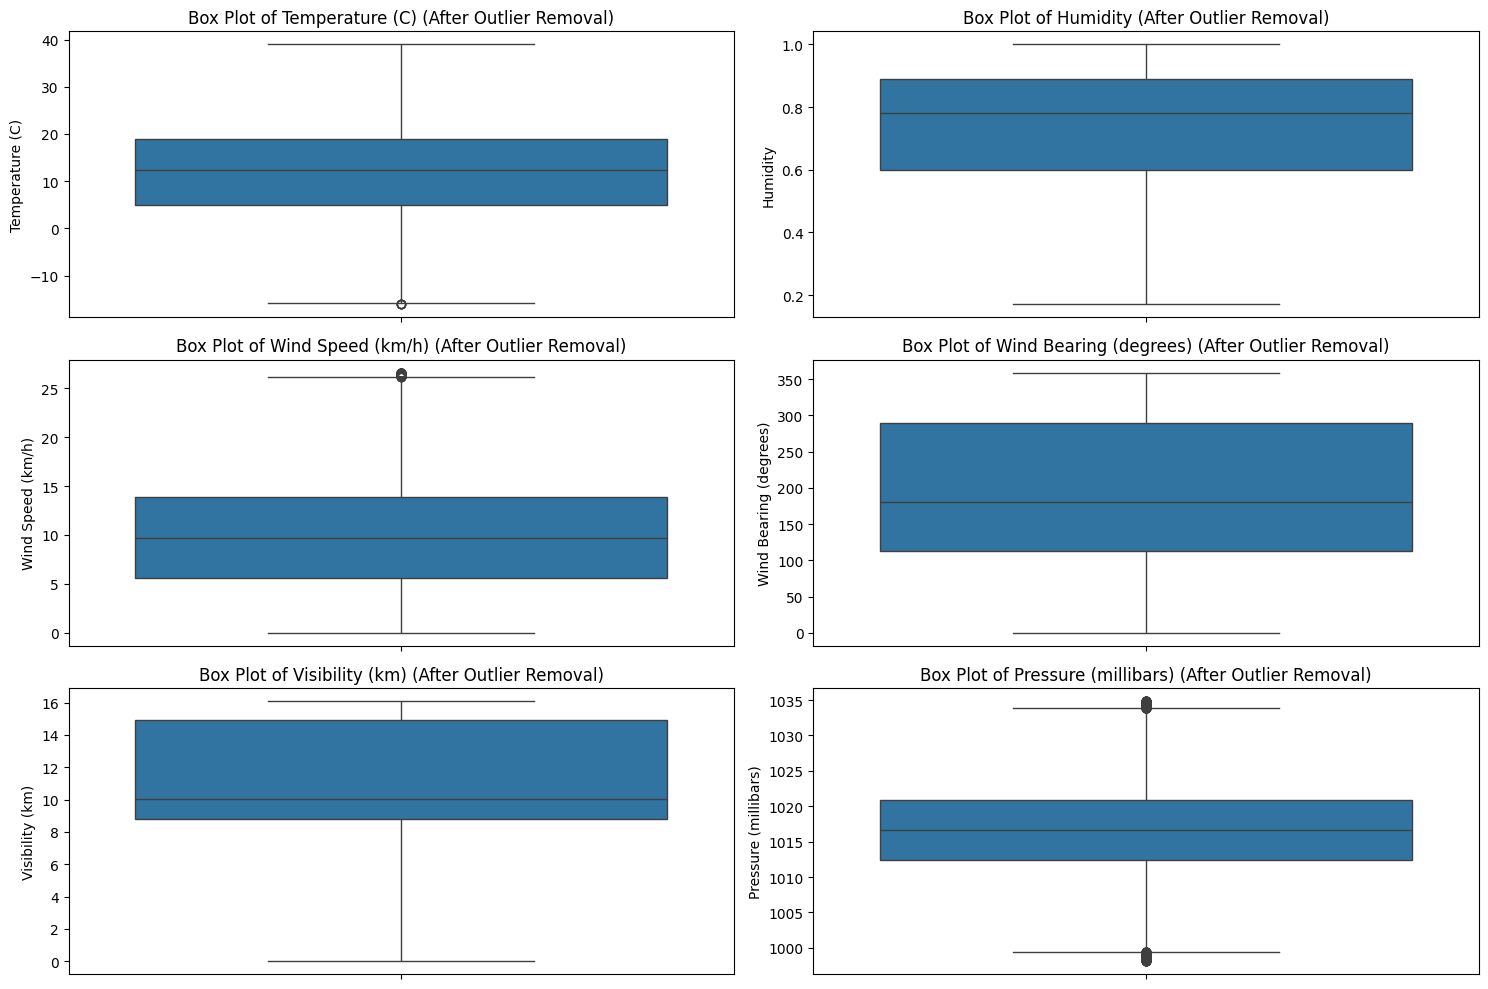

In [79]:
#checking independent variable after removing outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i + 1)  # Creating a subplot for each feature
    sns.boxplot(y=data_no_outliers[feature])  # Create a boxplot
    plt.title(f'Box Plot of {feature} (After Outlier Removal)')
    plt.ylabel(feature)

plt.tight_layout() 
plt.show()

Splitting the cleaned dataset into training and testing sets

In [80]:
X_clean = data_no_outliers.values
y_clean = y_no_outliers.values

Checking Correlation

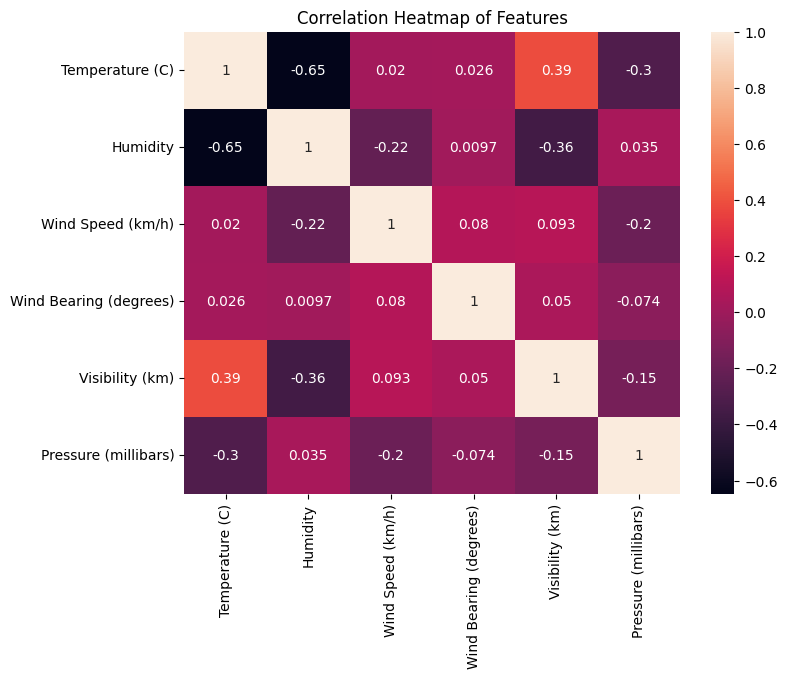

In [81]:
#Convert the cleaned data back to a DataFrame
X_clean = pd.DataFrame(X_clean, columns=features)

correlation_matrix = X_clean.corr()#creates correlation matrix

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap of Features')
plt.show()

Feature scaling

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
X_test_scaled

array([[ 0.80461612,  1.05075232, -0.40768579, -0.57313847, -0.28644291,
        -0.34030885],
       [-0.33760691, -1.50486186,  0.3846116 , -1.73968447,  1.22252693,
         1.94822052],
       [-0.89167909, -1.30041273, -1.05367043, -1.33839265,  0.18052729,
         1.56951107],
       ...,
       [-0.47509672,  0.4885172 ,  2.04926431,  0.7800549 ,  1.28813432,
        -1.6820646 ],
       [ 0.80696637, -0.07371792,  0.01468878,  1.41465593, -0.0124356 ,
        -1.60809791],
       [ 0.23526729, -0.89151446, -1.29660482, -1.63702843, -0.11277631,
         0.23367266]])

create and train Regression model

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled) #predicting output

LinearRegression()

In [86]:
y_pred

array([20.37997131,  7.27378782,  2.1845954 , ...,  5.17383365,
       19.86630031, 14.31050713])

Model Performance

Mean Squared Error: 1.0140724654379838
R^2 Score: 0.990902893896869
The accuracy of our model is 99.0%


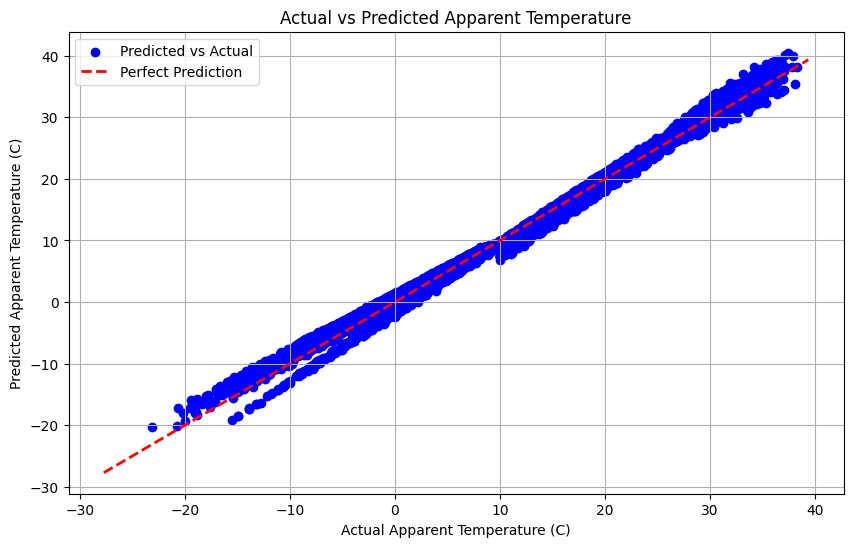

In [70]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print("The accuracy of our model is {}%".format(round(r2, 2) *100))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted Apparent Temperature')
plt.xlabel('Actual Apparent Temperature (C)')
plt.ylabel('Predicted Apparent Temperature (C)')
plt.legend()
plt.grid()
plt.show()